In [1]:
import numpy as np
import matplotlib.pyplot as plt

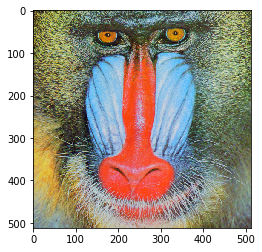

In [92]:
data = plt.imread('mandrill.tiff')
plt.imshow(data)

In [107]:
def k_nearest(k):
    centroid = np.zeros((k, 3))
    for i in range(k):
        r = np.random.randint(0, 511, size = 2)
        centroid[i,:] = mandrill_image[r[0], r[1], :]
    belongings = np.zeros(mandrill_image.shape[:2])
    
    for j in range(10):
        for row in range(mandrill_image.shape[0]):
            for column in range(mandrill_image.shape[1]):
                pixel = mandrill_image[row, column, :]
                distance = np.zeros((k,1))
                for num in range(k):
                    distance[num] = np.linalg.norm(pixel - centroid[num])
                belongings[row, column] = np.argmin(distance)

        #for m in range(k):            
            #centroid[m] = np.sum(mandrill_image[belongings == m], axis = 0) / mandrill_image[belongings == m].shape[0]
        mandrill_image_copy = np.zeros_like(mandrill_image)
        for row in range(mandrill_image.shape[0]):
            for column in range(mandrill_image.shape[1]):
                mandrill_image_copy[row][column] = centroid[int(belongings[row, column])]
            
    plt.imshow(mandrill_image_copy)

In [101]:
def color_quantization(k):    
    centroids = np.zeros((k, 3)) #creates the centroids    
    energy_list = [] # keeps count of the energy vs iterations which is 10    
    for j in range(k):        
        r = np.random.randint(0, 511, size = 2) #random number for the centroids        
        centroids[j,:] = data[r[0], r[1],:]    
    index = np.zeros(data.shape[:2])    
    belongings = np.zeros((512,512)) 
    for m in range(10): #we are looping through a total of 10         
        for n in range(data.shape[0]):            
            for p in range(data.shape[1]):                
                pixel = data[n,p,:]                
                distance = np.zeros((k,1))                
                for l in range(k):                    
                    distance[l] = np.linalg.norm(pixel-centroids[l]) # calculating the distance                
                    belongings[n,p] = np.argmin(distance)              
        for m in range(k):            
            centroids[m] = np.sum(data[belongings == m], axis = 0) / data[belongings == m].shape[0] 
                                
        new_data = np.zeros_like(data)    
        for n in range(data.shape[0]):        
            for p in range(data.shape[1]):            
                new_data[n,p] = centroids[int(belongings[n,p])]    
                
    plt.figure(figsize = (18,8))    
    plt.subplot(1,3,1)    
    plt.title(f"K = {k}")    
    plt.imshow(new_data)     
    plt.subplot(1,3,2)    
    plt.title("Original")    
    plt.imshow(data)    


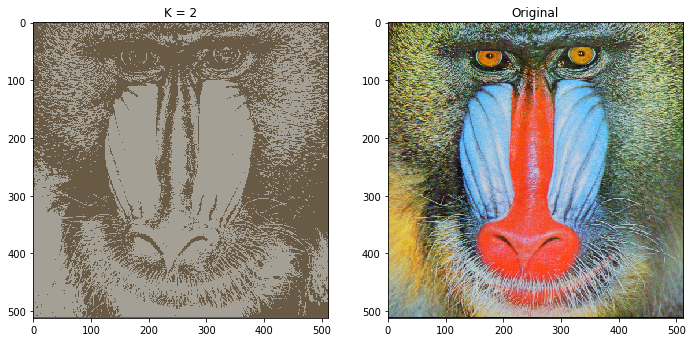

In [102]:
color_quantization(2)

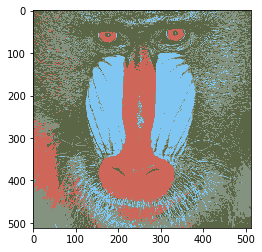

In [109]:
k_nearest(4)

In [110]:
"""
Steps:
1. Find centroids
2. Grab each pixel color and subtract that from the centroid, which will give you the distance
3. Find the shortest distance between the pixel and the centroid
4. Create new data to specify the pixel with the centroid color
"""

'\nSteps:\n1. Find centroids\n2. Grab each pixel color and subtract that from the centroid, which will give you the distance\n3. Find the shortest distance between the pixel and the centroid\n4. Create new data to specify the pixel with the centroid color\n'